# init

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [71]:
path = "data/"

X = pd.read_csv(path + 'DatasetClean.csv')

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       17895 non-null  int64  
 1   explicit          17895 non-null  bool   
 2   popularity        17895 non-null  int64  
 3   artists           17895 non-null  object 
 4   album_name        17895 non-null  object 
 5   danceability      17895 non-null  float64
 6   energy            17895 non-null  float64
 7   key               17895 non-null  int64  
 8   loudness          17895 non-null  float64
 9   speechiness       17895 non-null  float64
 10  acousticness      17895 non-null  float64
 11  instrumentalness  17895 non-null  float64
 12  liveness          17895 non-null  float64
 13  valence           17895 non-null  float64
 14  tempo             17895 non-null  float64
 15  time_signature    17895 non-null  float64
 16  n_beats           17895 non-null  float6

scelgo la variabile genere come variabile da predire

## gestisco explicit

In [73]:
X['explicit'] = X['explicit'].astype(int)

## divido il target y

In [74]:
y_String = X['genre']
y = X['genre']
X = X.drop(['genre', 'genre_val'], axis=1)

In [75]:
#divido le label da cercare
# le = LabelEncoder()
# y = le.fit_transform(y_String)
# print(y)
# set(y)

## gestisco le variabili categoriche

In [76]:
# categorical_cols = X.select_dtypes(include=['object']).columns
# numerical_cols = X.select_dtypes(include=[np.number]).columns

In [77]:
# categorical_cols

In [78]:
# numerical_cols

In [79]:
# Codifica le caratteristiche categoriali
# X_categorical = pd.get_dummies(X[categorical_cols])
# X_categorical

In [80]:
# X = pd.concat([X[numerical_cols], X_categorical], axis=1)

In [81]:
X = X[X.select_dtypes(include=[np.number]).columns]

## separo nuovamente il dataset in train + test

In [82]:
# Divisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## scalo i dati

In [83]:
# Standardizzazione delle caratteristiche
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Applica fit_transform ai dati di training
X_train_scaled = scaler.fit_transform(X_train)

# Applica transform ai dati di test
X_test_scaled = scaler.transform(X_test)

# Models

applico i modelli

## Decision Tree

In [84]:
# DT
clf = DecisionTreeClassifier(random_state=42)

# Addestra il modello
clf.fit(X_train_scaled, y_train)

# Predici i valori
y_pred = clf.predict(X_test_scaled)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4173184357541899
Classification Report:
               precision    recall  f1-score   support

     afrobeat       0.25      0.28      0.27        92
  black-metal       0.66      0.66      0.66        86
    bluegrass       0.47      0.38      0.42        91
       brazil       0.26      0.21      0.23        87
    breakbeat       0.32      0.33      0.32        87
chicago-house       0.47      0.45      0.46       105
       disney       0.49      0.44      0.46        98
        forro       0.59      0.62      0.60        99
        happy       0.39      0.39      0.39        95
          idm       0.40      0.39      0.40        95
       indian       0.25      0.24      0.24        92
   industrial       0.41      0.41      0.41        95
      iranian       0.51      0.56      0.53        77
      j-dance       0.35      0.36      0.36        83
       j-idol       0.38      0.47      0.42        81
     mandopop       0.31      0.31      0.31        90
        slee

In [85]:
clf.get_depth()

28

In [86]:
clf.min_samples_leaf

1

In [87]:
clf.min_samples_split

2

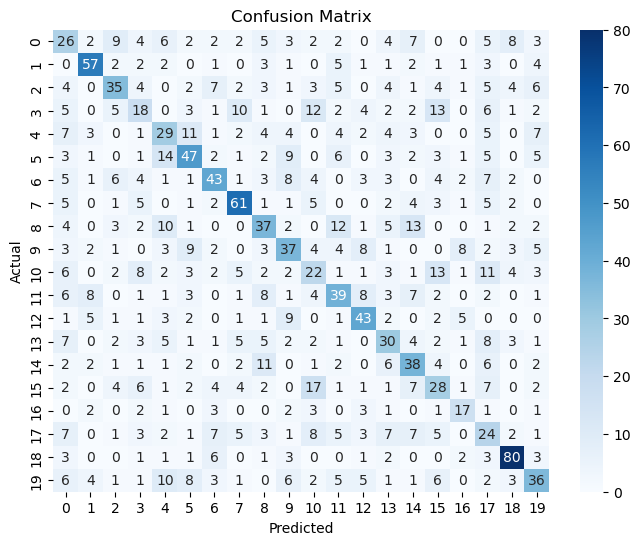

In [88]:
# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c'è un overfitting, 100% corretti i dati predetti.  
Faccio una prova: genero un DecisionTree con applicando il pruning per evitare overfitting.  
get_depth() == 13, posso fare pruning => 5? 7?

### Pruning

In [97]:
# Crea un Decision Tree con pruning
clf_pruning = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)

# Addestra il modello
clf_pruning.fit(X_train_scaled, y_train)

# Predici i valori
y_pred = clf_pruning.predict(X_test_scaled)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4519553072625698
Classification Report:
               precision    recall  f1-score   support

     afrobeat       0.39      0.36      0.37        92
  black-metal       0.65      0.67      0.66        86
    bluegrass       0.34      0.47      0.40        91
       brazil       0.24      0.26      0.25        87
    breakbeat       0.33      0.41      0.37        87
chicago-house       0.52      0.47      0.49       105
       disney       0.54      0.44      0.49        98
        forro       0.55      0.56      0.55        99
        happy       0.49      0.42      0.45        95
          idm       0.50      0.42      0.46        95
       indian       0.30      0.28      0.29        92
   industrial       0.35      0.28      0.31        95
      iranian       0.61      0.70      0.65        77
      j-dance       0.50      0.43      0.46        83
       j-idol       0.48      0.52      0.50        81
     mandopop       0.36      0.49      0.42        90
        slee

In [90]:
# Valutazione del modello con cross-validation
scores = cross_val_score(clf_pruning, X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.47946354 0.45822856 0.46940486 0.45487566 0.459905  ]
Mean Cross-Validation Accuracy: 0.46437552388935455


In [91]:
labels = np.unique(y)
labels

array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
       'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
       'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
       'spanish', 'study', 'techno'], dtype=object)

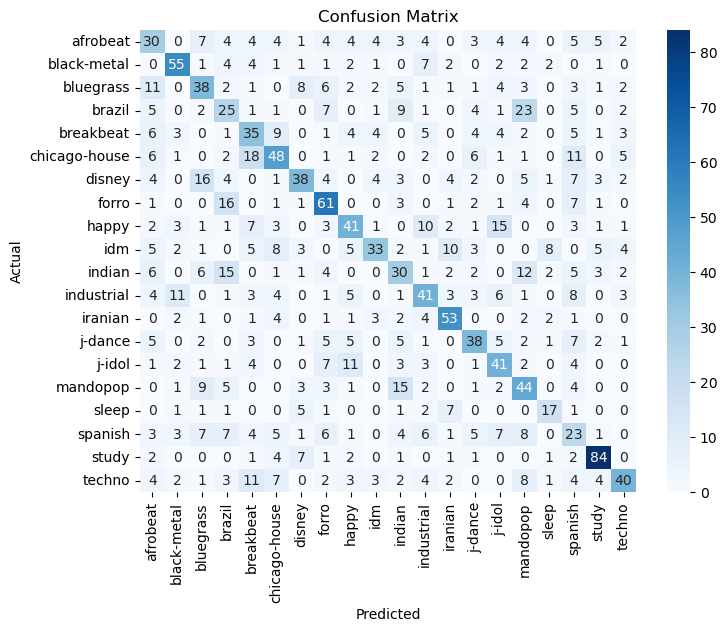

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN

Classification Report:
                precision    recall  f1-score   support

     afrobeat       0.24      0.39      0.30        92
  black-metal       0.46      0.66      0.54        86
    bluegrass       0.37      0.55      0.44        91
       brazil       0.23      0.31      0.26        87
    breakbeat       0.29      0.29      0.29        87
chicago-house       0.55      0.65      0.60       105
       disney       0.56      0.48      0.52        98
        forro       0.62      0.67      0.64        99
        happy       0.47      0.43      0.45        95
          idm       0.44      0.33      0.37        95
       indian       0.31      0.24      0.27        92
   industrial       0.28      0.21      0.24        95
      iranian       0.64      0.44      0.52        77
      j-dance       0.47      0.41      0.44        83
       j-idol       0.50      0.58      0.54        81
     mandopop       0.36      0.46      0.40        90
        sleep       0.78      0.38      

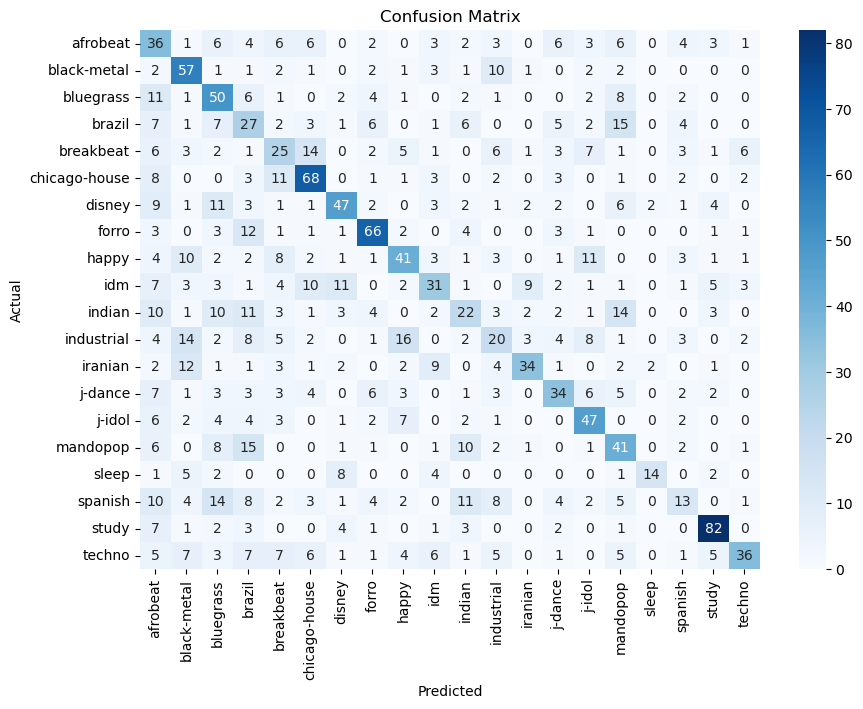

In [93]:
# Inizializzare e addestrare il modello KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fare previsioni
y_pred = knn.predict(X_test_scaled)

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizzare la matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
scores = cross_val_score(knn, X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.43559654 0.42861134 0.42609668 0.43839061 0.42525845]
Mean Cross-Validation Accuracy: 0.43079072366582843


## Naive Bayes

/Users/logan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/logan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/logan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                precision    recall  f1-score   support

     afrobeat       0.60      0.03      0.06        92
  black-metal       0.58      0.49      0.53        86
    bluegrass       0.00      0.00      0.00        91
       brazil       0.38      0.09      0.15        87
    breakbeat       0.23      0.08      0.12        87
chicago-house       0.50      0.62      0.55       105
       disney       0.12      0.97      0.21        98
        forro       0.36      0.43      0.39        99
        happy       0.43      0.23      0.30        95
          idm       0.43      0.11      0.17        95
       indian       0.00      0.00      0.00        92
   industrial       0.45      0.18      0.26        95
      iranian       0.71      0.22      0.34        77
      j-dance       0.31      0.36      0.34        83
       j-idol       0.26      0.75      0.39        81
     mandopop       0.36      0.40      0.38        90
        sleep       0.67      0.05      

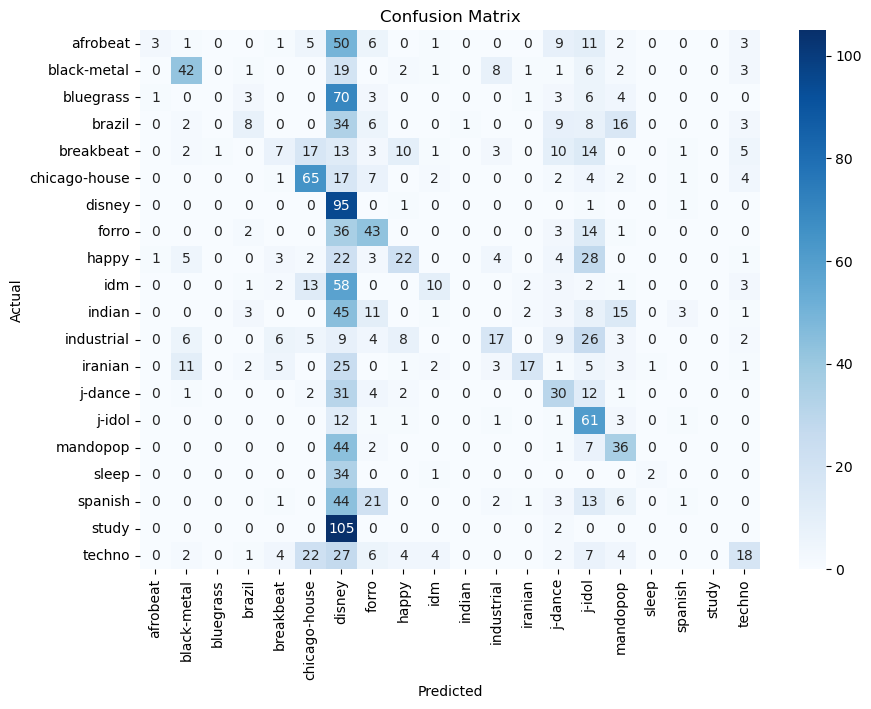

In [94]:
# Inizializzare e addestrare il modello Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Fare previsioni
y_pred = nb.predict(X_test_scaled)

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizzare la matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
scores = cross_val_score(nb, X_scaled, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.28192232 0.21626153 0.26711372 0.28052529 0.27326069]
Mean Cross-Validation Accuracy: 0.26381670857781503
